In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def kMeans_init_centroids(X, K):
    m, n = X.shape
    centroids = X[np.random.choice(m, K, replace=False)]
    return centroids

def assign_labels(X, centroids):
    m = X.shape[0]
    K = centroids.shape[0]
    labels = np.zeros(m)

    for i in range(m):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        labels[i] = np.argmin(distances)

    return labels


In [33]:
def update_centroids(X, labels, K):
    m, n = X.shape
    new_centroids = np.zeros((K, n))

    for k in range(K):
        points_in_cluster = X[labels == k]
        if points_in_cluster.shape[0] > 0:
            new_centroids[k] = np.mean(points_in_cluster, axis=0)

    return new_centroids

def run_kMeans(X, K, max_iters=100):
    centroids = kMeans_init_centroids(X, K)
    prev_centroids = centroids.copy()
    labels = np.zeros(X.shape[0])

    for _ in range(max_iters):
        labels = assign_labels(X, centroids)
        centroids = update_centroids(X, labels, K)

        if np.all(centroids == prev_centroids):
            break
        prev_centroids = centroids.copy()

    return centroids, labels

In [34]:
X = np.load("/content/drive/MyDrive/Colab Notebooks/kmeans2d.npy")
print("First five elements of X are:\n", X[:5])
print("The shape of X is:", X.shape)

K = 3
centroids, labels = run_kMeans(X, K, max_iters=500)

print("Cluster centers shape:", centroids.shape)
print("Labels shape:", labels.shape)


First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)
Cluster centers shape: (3, 2)
Labels shape: (300,)


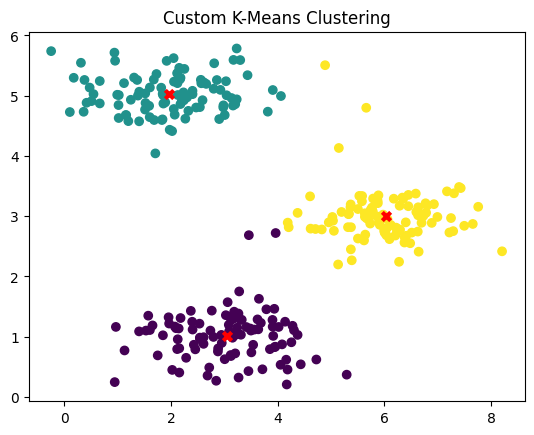

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='r', linewidths=3)
plt.title("Custom K-Means Clustering")
plt.show()

## Image Cluster

Shape of original_img is: (128, 128, 3)


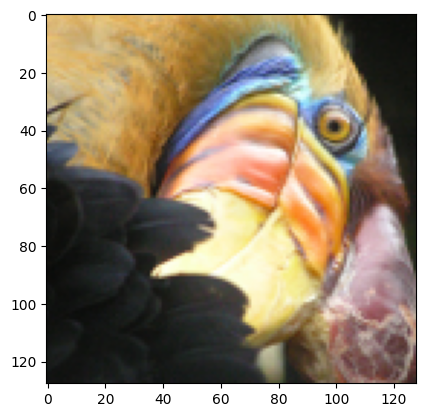

In [36]:
# Load an image of a bird
original_img = plt.imread('/content/drive/MyDrive/Colab Notebooks/bird_small.png')
plt.imshow(original_img)
print("Shape of original_img is:", original_img.shape)

In [39]:
original_img = plt.imread('/content/drive/MyDrive/Colab Notebooks/bird_small.png')
original_img = original_img / 255.0
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))
K_values = [4, 8, 16, 32, 64, 128, 256]

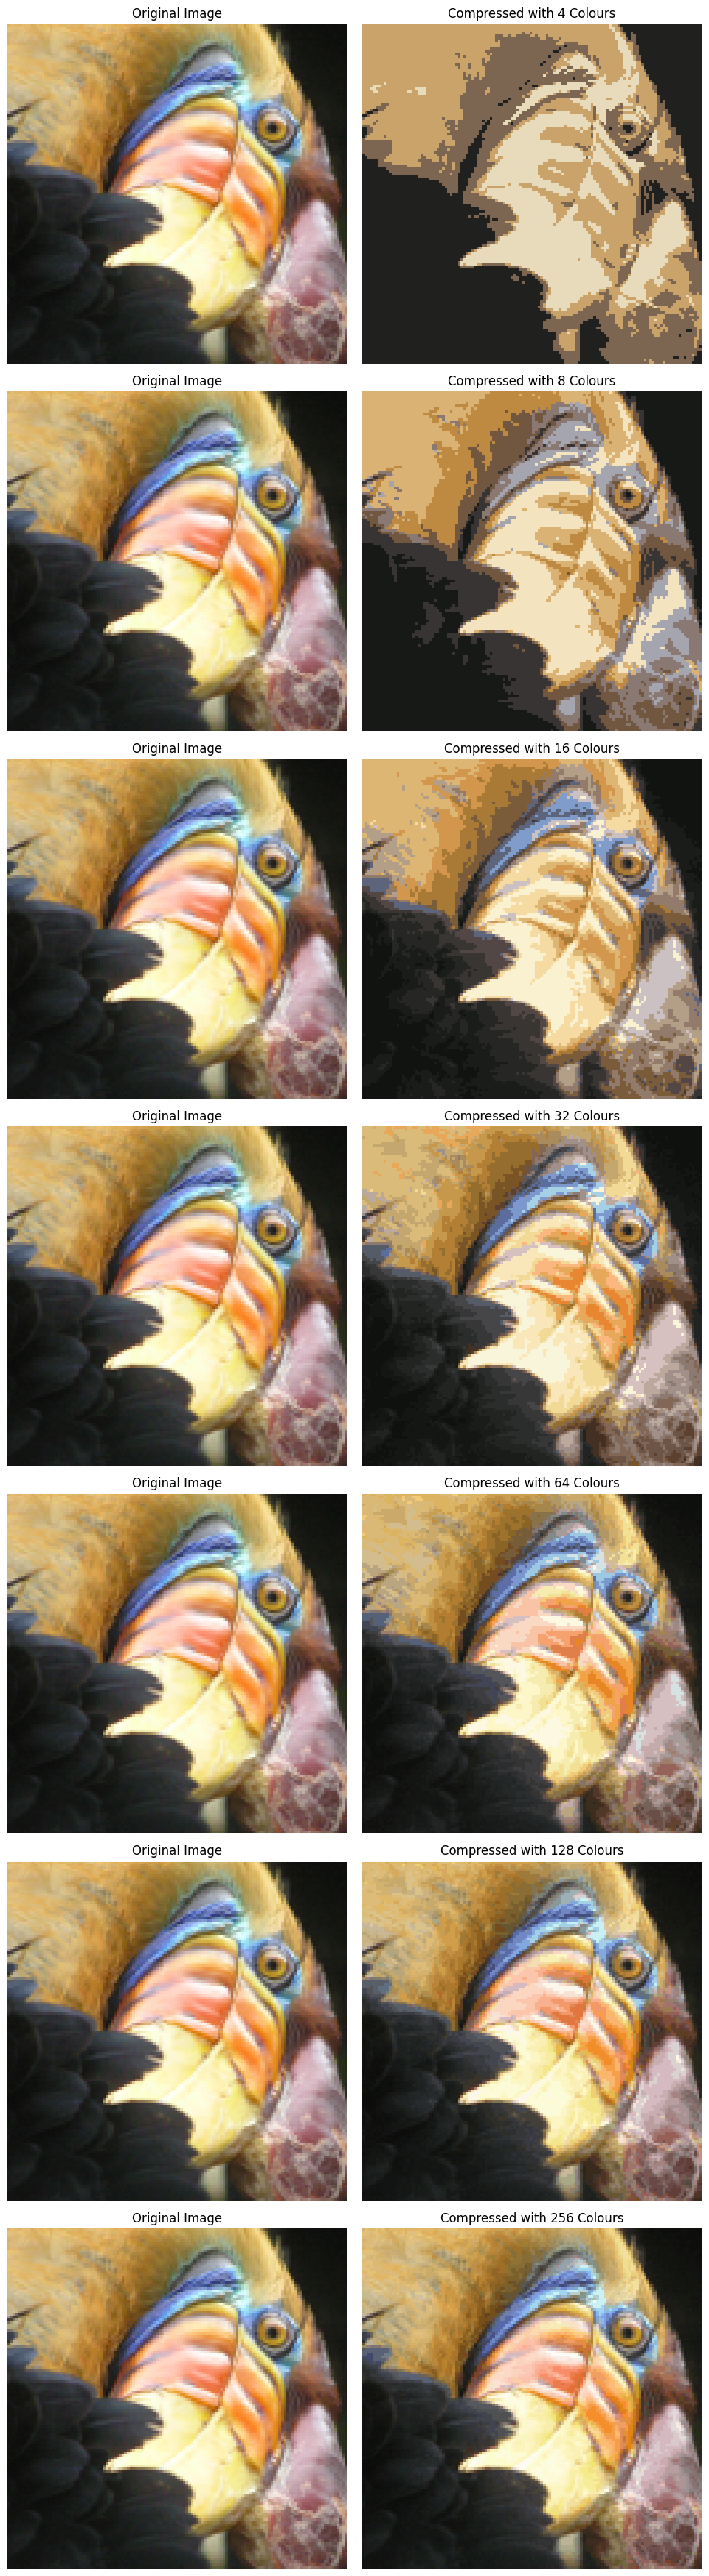

Cluster Centers for K=256:
[[0.00102661 0.00106677 0.0012291 ]
 [0.00049554 0.00052168 0.00054577]
 [0.0002415  0.00030131 0.00023581]
 [0.00197761 0.00155523 0.00153802]
 [0.00257992 0.00174036 0.00134791]
 [0.00388589 0.00306098 0.00235171]
 [0.0031879  0.00267815 0.00174702]
 [0.00267318 0.00152973 0.00042246]
 [0.00326483 0.0028587  0.00297409]
 [0.00384262 0.00314648 0.00213251]
 [0.00241757 0.00171015 0.00060582]
 [0.00055902 0.00065359 0.00037601]
 [0.00310855 0.00252067 0.00142899]
 [0.00350378 0.0017301  0.00082596]
 [0.00289815 0.00261354 0.00193076]
 [0.00347677 0.00202959 0.00033636]
 [0.00029956 0.00030789 0.0002475 ]
 [0.00041568 0.00044327 0.00039962]
 [0.00379952 0.00350209 0.00304662]
 [0.00177524 0.00181223 0.00159961]
 [0.00309698 0.00184544 0.00048919]
 [0.00033977 0.00038605 0.00035543]
 [0.00186939 0.00156785 0.00110006]
 [0.00313166 0.00199923 0.00139387]
 [0.00365398 0.00328126 0.00213317]
 [0.00112215 0.00126849 0.00211829]
 [0.00384083 0.00289888 0.00211457]
 

In [40]:
fig, ax = plt.subplots(len(K_values), 2, figsize=(10, 5 * len(K_values)))
for i, K in enumerate(K_values):
    centroids, labels = run_kMeans(X_img, K, max_iters=30)

    X_recovered = centroids[labels.astype(int), :]
    X_recovered = np.reshape(X_recovered, original_img.shape)

    ax[i, 0].imshow(original_img * 255)
    ax[i, 0].set_title(f'Original Image')
    ax[i, 0].axis('off')

    ax[i, 1].imshow(X_recovered * 255)
    ax[i, 1].set_title(f'Compressed with {K} Colours')
    ax[i, 1].axis('off')

plt.tight_layout()
plt.show()

print(f"Cluster Centers for K={K_values[-1]}:\n{centroids}")
print(f"Labels shape: {labels.shape}")


## High Dimensional

In [77]:
# Synthetic high-dimensional data
np.random.seed(42)
num_points = 1000
num_features = 50
num_clusters = 2

In [78]:
# Generate random data centered around different means
data = []
for i in range(num_clusters):
    center = np.random.uniform(-10, 10, num_features)
    cluster_data = center + np.random.normal(0, 2, (num_points // num_clusters, num_features))
    data.append(cluster_data)

In [79]:
# Combine all clusters into a single dataset
high_dim_data = np.vstack(data)
print(f"Data shape: {high_dim_data.shape}")  # (1000, 50)

Data shape: (1000, 50)


In [80]:
centroids, labels = run_kMeans(high_dim_data, K=num_clusters, max_iters=1000)
print(f"Centroids shape: {centroids.shape}")  # Should be (2, 50)
print(f"Labels shape: {labels.shape}")        # Should be (1000,)

Centroids shape: (2, 50)
Labels shape: (1000,)


In [81]:
from sklearn.decomposition import PCA

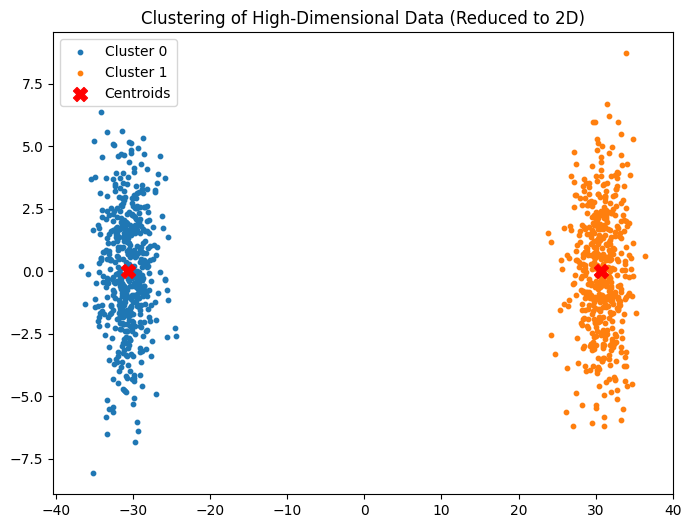

In [82]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(high_dim_data)
reduced_centroids = pca.transform(centroids)

plt.figure(figsize=(8, 6))
for k in range(num_clusters):
    cluster_points = reduced_data[labels == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {k}", s=10)

plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title("Clustering of High-Dimensional Data (Reduced to 2D)")
plt.legend()
plt.show()